Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Zander Bonnet"

---

# Homework 10

In this assignment, we're working with MySQL. I am assuming that you have successfully installed MySQL and the python module `mysql-connector-python` on your machine. You can find installation instructions for both on Piazza. We'll be working with the SAKILA database. This database contains transactions from a fictional chain of DVD rental stores. You can find the files you need to install the SAKILA database [here](https://dev.mysql.com/doc/index-other.html). Click on the `zip` option for the SAKILA database. Unzip the directory you downloaded and save the files in some folder on your machine. 

To create the database on the MySQL server on your machine:

1. Save the files `sakila-schema.sql` and `sakila-data.sql` from the unzipped directory under some path on your machine, say under "MyPath/sakila-schema.sql"
2. Log on to MySQL as root and run the following commands (I'm assuming that 'user' is an existing user that you have previously created). 

```
CREATE DATABASE Sakila;
GRANT ALL PRIVILEGES ON Sakila.* to 'user'@'localhost';
USE Sakila;
SOURCE MyPath/sakila-schema.sql;
SOURCE MyPath/sakila-data.sql;
QUIT;
```

3. Then log on as the user and change the database to Sakila. 

```
USE Sakila;
```

You can find an ER-schema of the Sakila database on Canvas. 

For some of the problems below you are asked to show the SQL code which you would run in order to find the answer to a specific question. You can show both the SQL code and your answer to the question in a Markdown cell. Note, that you should be able to write down the SQL code, even if you were not able to install MySQL or the Sakila database on your machine. You *do not* have to include the output you get from MySQL for these types of questions. 

**Example Question:** How many different languages can you find in the `language` table? 

**Example Answer:**

SQL code: 
```SELECT * from language;``` 

Answer: 6 different languages. 

For other problems, you will be asked to obtain data and then do something with those data in python. You will only be able to complete these problems, if you were able to install MySQL and download the Sakila database. If you still need help with installing MySQL, ask me as soon as possible. I will not be available for "tech help" on the day this homework is due. 

### Problem 1

Describe the `Rental` table. How many columns does that table have? How many entries are in the table? What is the primary key of the `Rental` table? How is it generated? 

-The table has 7 columns

-There are 16049 enteries

-The primary key of rental is rental_id

-rental_id is generated sequentialy staring at 1

### Problem 2

What are the variable types of the variables `staff_id`, `customer_id`, and `rental_id` in the `Rental` table, respectively? Why is it useful or necessary to use these different variable types for these three variables? Why can't they all be stored as tinyint's for example? 

staff_id = tinyint unsigned, customer_id = smallint unsigned, rental_id = int

It is useful to know this becasue that lets you know what kind of data you can input into the table. In this case it is saying how large of a number you can assign to the column. A tiny int can only exist from 0 to 255 while an int can exist in a much larger range. This is done to save memory.

### Problem 3

Provide the SQL code with which you would update the `Actor` table with a new row that has your own first and last name. The command for today's date in SQL is `NOW()`. 

Then provide the SQL code with which you would remove all rows with your name (first and last) from the actors table. 

INSERT INTO Actor

-> (actor_id,first_name, last_name, last_update)

-> VALUES (null,'ZANDER','BONNET', NOW());

DELETE FROM Actor 

-> WHERE first_name= 'ZANDER' AND last_name = 'BONNET';

### Problem 4

(a) Use Python to extract the columns `staff_id`, `amount`, and `payment_date` from the `Payment` table. 
Store these data in a Pandas data frame and display the data frame to the console for the grader to see.

In [2]:
import mysql.connector
import pandas as pd

# YOUR CODE HERE 
config = {'user': 'Homework', 'auth_plugin' : 'mysql_native_password', 'password': 'password', 
          'host': 'localhost', 'database': 'Sakila'}
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

cursor.execute('SELECT staff_id, amount, payment_date FROM Payment')
data = cursor.fetchall()
f = pd.DataFrame(data, columns = ['staff_id', 'amount', 'payment_date'])
f

,staff_id,amount,payment_date
0,1,2.99,2005-05-25 11:30:37
1,1,0.99,2005-05-28 10:35:23
2,1,5.99,2005-06-15 00:54:12
3,2,0.99,2005-06-15 18:02:53
4,2,9.99,2005-06-15 21:08:46
...,...,...,...
16044,1,4.99,2005-08-21 17:43:42
16045,1,1.99,2005-08-21 21:41:57
16046,2,8.99,2005-08-23 06:09:44
16047,2,2.99,2005-08-23 11:08:46


(b) For the dataframe created in (a), take the date values and use either string formating or the `pd.DatetimeIndex()` method  to extract just the month and the year of the transaction. Store both in separate columns of the data frame. 

Use groupby to find the total monthly transaction amounts, separately for each employee. 

Use Matplotlib to create a line-plot that shows the total transaction amount per employee per month as a function of time. Label the x-axis with the appropriate month/year combination and include one line per employee. Include a legend to indicate which line belongs to which employee. You can find an image on Canvas with an example of what your graph should look like. 

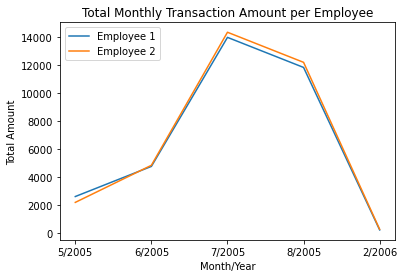

In [3]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
dates = pd.DatetimeIndex(f['payment_date']) #Gets dates and times in easy to work with format
months = []
years = []
for i in range(len(dates)):  #Loops over all dates and times 
    months.append(dates[i].month) # Appends the month number to the month list
    years.append(dates[i].year)   #Appends teh year number to the year list
f['month'] = months  #Adds months to the data frame in a new column
f['year'] = years    #Adds years to the data frame in a new column

gr = f.groupby(['staff_id', 'year','month'])['amount'].sum() #Gets the sum of monthly revenue 
                                                             #per employee by year and month

labs = []
for i in range(len(list(gr[1].index))): #Loops over unique years and months to create a lable to be used in the graph
    labs.append((str(gr[1].index[i][1]) + "/" + str(gr[1].index[i][0])))


fig, ax = plt.subplots()
ax.plot(gr[1].values, label = "Employee 1");
ax.plot(gr[2].values, label = "Employee 2")
plt.xticks(range(len(labs)), labs)
ax.set_xlabel('Month/Year')
ax.set_ylabel("Total Amount")
ax.set_title("Total Monthly Transaction Amount per Employee")
ax.legend();